# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
RANDOM_STATE=12345

In [2]:
#Загружаем данные

data_0 = pd.read_csv('/datasets/geo_data_0.csv')

data_1 = pd.read_csv('/datasets/geo_data_1.csv')

data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
#Напишем функцию, которая предоставит нам полную информацию о данных

def study(data): 
    info = display(data.head(10)), data.info(), display(data.describe())

In [4]:
#Делаем вызов функции

study(data_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
#Делаем вызов функции

study(data_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [6]:
#Делаем вызов функции

study(data_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [7]:
#Проверим данные на явные дубликаты

print('Количество дубликатов data_0:', data_0.duplicated().sum())

print('Количество дубликатов data_1:', data_1.duplicated().sum())

print('Количество дубликатов data_2:', data_2.duplicated().sum())

Количество дубликатов data_0: 0
Количество дубликатов data_1: 0
Количество дубликатов data_2: 0


В данных присутствует столбец 'id'. Для нас он не несет никакой ценности. Создадим новые датафрэймы без этой информации.

In [8]:
geo_0 = data_0.drop(['id'], axis=1)

geo_1 = data_1.drop(['id'], axis=1)

geo_2 = data_2.drop(['id'], axis=1)

In [9]:
#Посмотрим новые датафрэймы

geo_0.info()

geo_1.info()

geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1 

In [10]:
#Посмотрим нулевые значения в датафрэйме

geo_0[geo_0['product'] == 0]

,f0,f1,f2,product
57263,-0.702064,0.375992,0.236572,0.0


In [11]:
#Посмотрим нулевые значения в датафрэйме

geo_1[geo_1['product'] == 0]

,f0,f1,f2,product
11,16.320755,-0.562946,-0.001783,0.0
13,6.695604,-0.749449,-0.007630,0.0
62,21.418478,-5.134490,-0.002836,0.0
63,6.822701,3.104979,-0.000723,0.0
77,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...
99936,5.085749,-3.980305,0.005063,0.0
99948,8.277805,-9.178818,0.003275,0.0
99956,13.343983,-1.290200,0.005980,0.0
99961,13.854163,-11.528089,-0.005556,0.0


In [12]:
#Посмотрим нулевые значения в датафрэйме

geo_2[geo_2['product'] == 0]

,f0,f1,f2,product
68149,-0.865596,-1.615247,-4.126441,0.0


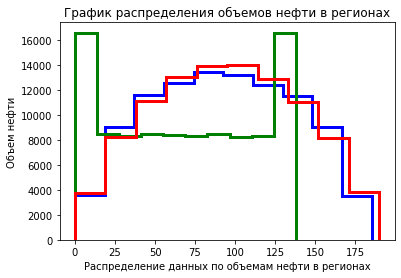

In [13]:
#Визуализируем данные запасов сырья

plt.title('График распределения объемов нефти в регионах')
geo_0['product'].plot(kind='hist', histtype='step', linewidth=3, color='b')
geo_1['product'].plot(kind='hist', histtype='step', linewidth=3, color='g')
geo_2['product'].plot(kind='hist', histtype='step', linewidth=3, color='r')
plt.xlabel('Распределение данных по объемам нефти в регионах')
plt.ylabel('Объем нефти')
plt.show()

# Вывод

Проанализировали данные, целевым признаком является столбец **'product'**. Можем заметить, что в регионе 1(geo_1) в столбце **'product'** 8,235% это нулевые значения. Возможно, что данные были утеряны, но мы можем только предполагать. Как в дальнейшем это может отразиться на анализе пока не ясно. Данные готовы для обучения, у всех датафрэймов одинаковый размер, явных дубликатов не выявлено, пропусков нет. 

## Обучение и проверка модели

In [14]:
#Разделим на признаки и целевой признак, разобьем данные на обучающую и валидационную выборки в соотношении 75:25

features = geo_0.drop('product', axis=1)

target = geo_0['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features,
                                                    target,
                                                    test_size=.25,
                                                    random_state=RANDOM_STATE)

In [15]:
#Посмотрим размер разбивки

features_train_0.shape, features_valid_0.shape

((75000, 3), (25000, 3))

In [16]:
#Разделим на признаки и целевой признак, разобьем данные на обучающую и валидационную выборки в соотношении 75:25

features = geo_1.drop('product', axis=1)

target = geo_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features,
                                                    target,
                                                    test_size=.25,
                                                    random_state=RANDOM_STATE)

In [17]:
#Посмотрим размер разбивки

features_train_1.shape, features_valid_1.shape

((75000, 3), (25000, 3))

In [18]:
#Разделим на признаки и целевой признак, разобьем данные на обучающую и валидационную выборки в соотношении 75:25

features = geo_2.drop('product', axis=1)

target = geo_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features,
                                                    target,
                                                    test_size=.25,
                                                    random_state=RANDOM_STATE)

In [19]:
#Посмотрим размер разбивки

features_train_2.shape, features_valid_2.shape

((75000, 3), (25000, 3))

**Обучающие выборки** - features_train_0, target_train_0; features_train_1, target_train_1; features_train_2, target_train_2.

**Валидационные выборки** - features_valid_0, target_valid_0; features_valid_1, target_valid_1; features_valid_2, target_valid_2.

In [20]:
# код ревьюера
from sklearn.preprocessing import StandardScaler

In [21]:
#Выполним масштабирование признаков

numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()

scaler.fit(features_train_0[numeric])

StandardScaler()

In [22]:
#Масштабируем численные признаки обучающей и валидационной выборок для geo_0 

pd.options.mode.chained_assignment = None

features_train_0[numeric] = scaler.transform(features_train_0[numeric])
features_valid_0[numeric] = scaler.transform(features_valid_0[numeric])

features_train_0.head(), features_valid_0.head()

(             f0        f1        f2
 27212 -0.544828  1.390264 -0.094959
 7866   1.455912 -0.480422  1.209567
 62041  0.260460  0.825069 -0.204865
 70185 -1.837105  0.010321 -0.147634
 82230 -1.299243  0.987558  1.273181,
              f0        f1        f2
 71751  0.517917 -0.610097 -0.126226
 80493  0.568391 -0.086063 -0.814914
 2655   0.805688 -1.613289 -1.341342
 53233  0.222503 -1.355437 -0.597275
 91141 -0.087941  1.433113 -0.544588)

In [23]:
#Масштабируем численные признаки обучающей и валидационной выборок для geo_1 

pd.options.mode.chained_assignment = None

features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])

features_train_1.head(), features_valid_1.head()

(              f0         f1        f2
 27212  -8.013128  -3.650423  0.152445
 7866   21.015869   8.631534  0.151077
 62041  11.836247  -8.269973 -0.158429
 70185 -14.812491 -19.027858 -0.464425
 82230 -17.823038 -17.304038 -0.156771,
               f0         f1        f2
 71751  -0.997119  -4.189925  0.152721
 80493   9.770017 -28.027632 -0.157110
 2655   -8.034940 -10.050608 -0.462346
 53233  16.131117 -21.653765 -0.157168
 91141   6.415368  -9.410533 -0.766880)

In [24]:
#Масштабируем численные признаки обучающей и валидационной выборок для geo_2 

pd.options.mode.chained_assignment = None

features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])

features_train_2.head(), features_valid_2.head()

(             f0        f1        f2
 27212 -1.610736  2.159798 -0.430546
 7866  -2.332818 -1.893570 -1.308920
 62041 -2.818276  0.210194  0.314723
 70185  1.872286  4.885755 -0.819189
 82230 -0.951421  2.509998  0.895990,
              f0        f1        f2
 71751 -2.227708 -8.154832 -0.086197
 80493 -2.197772  2.035861 -1.071604
 2655  -5.832740 -1.315477 -0.263612
 53233  1.576180  2.715270  0.543945
 91141 -2.897651  7.691605  1.102770)

In [25]:
#Обучим модель и посмотрим на средний запас предсказанного сырья и RMSE модели (регион 0)

model_lr_0 = LinearRegression(normalize=True).fit(features_train_0,target_train_0)
prediction_0 = model_lr_0.predict(features_valid_0)

print('Средний запас предсказанного сырья', prediction_0.mean(), 'RMSE', mean_squared_error(target_valid_0, prediction_0)**0.5)

Средний запас предсказанного сырья 92.59256778438035 RMSE 37.5794217150813


In [26]:
#Обучим модель и посмотрим на средний запас предсказанного сырья и RMSE модели (регион 1)

model_lr_1 = LinearRegression(normalize=True).fit(features_train_1,target_train_1)
prediction_1 = model_lr_1.predict(features_valid_1)

print('Средний запас предсказанного сырья', prediction_1.mean(),'RMSE', mean_squared_error(target_valid_1, prediction_1)**0.5)

Средний запас предсказанного сырья 68.728546895446 RMSE 0.8930992867756168


In [27]:
#Обучим модель и посмотрим на средний запас предсказанного сырья и RMSE модели (регион 3)

model_lr_2 = LinearRegression(normalize=True).fit(features_train_2,target_train_2)
prediction_2 = model_lr_2.predict(features_valid_2)

print('Средний запас предсказанного сырья', prediction_2.mean(),'RMSE', mean_squared_error(target_valid_2, prediction_2)**0.5)

Средний запас предсказанного сырья 94.96504596800489 RMSE 40.02970873393434


In [28]:
#Для наглядности данных, объединим их в таблицу

tabl = pd.DataFrame(index=['средний запас предсказанного сырья','RMSE модели', 'реальный средний запас сырья'], 
                               columns=['регион 0','регион 1','регион 2'])
tabl['регион 0'] = prediction_0.mean(), mean_squared_error(target_valid_0, prediction_0)**0.5, geo_0['product'].mean()
tabl['регион 1'] = prediction_1.mean(), mean_squared_error(target_valid_1, prediction_1)**0.5, geo_1['product'].mean()
tabl['регион 2'] = prediction_2.mean(), mean_squared_error(target_valid_2, prediction_2)**0.5, geo_2['product'].mean()

tabl

,регион 0,регион 1,регион 2
средний запас предсказанного сырья,92.592568,68.728547,94.965046
RMSE модели,37.579422,0.893099,40.029709
реальный средний запас сырья,92.500000,68.825000,95.000000


# Вывод

Средний запас сырья по предсказаниям модели практически совпадают с реальным средним запасом сырья. Лучший показатель RMSE у модели, которая делала предсказания по данным региона 1. Как мы помним, в данных было много нулевых значений, по всей вероятности они повлияли на переобучение модели. По моему мнению, стоит исключить регион 1 как потенциально прибыльный, так как по сравнению с другими регионами его запасы гораздо ниже, а также часть данных утеряна и это мешает дальнейшей работе с ними. На рассмотрении остаются регион 0 и регион 2.


## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Бюджет на разработку скважин в регионе — 10 млрд рублей. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [29]:
#Необходимые константы для дальнейшей работы

UNIT_INCOME = 450000
POINTS = 200
BUDGET = 10000000000
TOTAL_POINTS = 500

In [30]:
#Посмотрим на средние запасы сырья для сравнения с достаточным объемом

print('Cредний запас сырья в 0 регионе:', geo_0['product'].mean())
print('Cредний запас сырья в 1 регионе:', geo_1['product'].mean())
print('Cредний запас сырья в 2 регионе:', geo_2['product'].mean())

Cредний запас сырья в 0 регионе: 92.50000000000001
Cредний запас сырья в 1 регионе: 68.82500000000002
Cредний запас сырья в 2 регионе: 95.00000000000004


In [31]:
#Вычислим бюджет для одной скважины

budget_one_well = BUDGET/POINTS
print('Бюджет одной скважины:', budget_one_well)

Бюджет одной скважины: 50000000.0


In [32]:
#Вычислим достаточный объем сырья

volume_one_well = budget_one_well/UNIT_INCOME
print('Достаточный объем сырья для безубыточной разработки', volume_one_well)

Достаточный объем сырья для безубыточной разработки 111.11111111111111


# Вывод

Достаточный объем сырья для безубыточной разработки равен 111.11111111111111, а это значит, для того, чтобы принять решение о строительстве новой скважины нам нужно больше данных.

## Расчёт прибыли и рисков 

In [33]:
#Преобразуем целевые признаки и предсказания в объект Series, это понадобится нам для дальнейшей работы

#Регион 0
target_valid_0 = pd.Series(target_valid_0).reset_index(drop=True)
prediction_0 = pd.Series(prediction_0).reset_index(drop=True)

#Регион 1
target_valid_1 = pd.Series(target_valid_1).reset_index(drop=True)
prediction_1 = pd.Series(prediction_1).reset_index(drop=True)

#Регион 2
target_valid_2 = pd.Series(target_valid_2).reset_index(drop=True)
prediction_2 = pd.Series(prediction_2).reset_index(drop=True)

In [34]:
#Создадим функцию для вычисления расчета прибыли

def profit (target, prediction):
    prediction_sort = prediction.sort_values(ascending=False)
    target_select = target[prediction_sort.index][:POINTS]
    return UNIT_INCOME * target_select.sum() - BUDGET

In [35]:
#Сделаем вызов функции и посчитаем прибыль для региона 0

profit_0 = profit(target_valid_0, prediction_0)

print(profit_0)

3320826043.1398506


In [36]:
#Сделаем вызов функции и посчитаем прибыль для региона 1

profit_1 = profit(target_valid_1, prediction_1)

print(profit_1)

2415086696.681511


In [37]:
#Сделаем вызов функции и посчитаем прибыль для региона 2

profit_2 = profit(target_valid_2, prediction_2)

print(profit_2)

2710349963.5998325


In [38]:
#Применим технику bootstrap для необходимых нам расчетов(средняя возможная прибыль региона, доверительный интервал, процент риска убытка)

state = np.random.RandomState(12345)

def bootstrap(target,prediction):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=TOTAL_POINTS, replace=True, random_state=state)
        prediction_subsample = prediction.loc[target_subsample.index]
        values.append(profit(target_subsample.reset_index(drop=True), prediction_subsample.reset_index(drop=True)))

    values = pd.Series(values)
    lower = values.quantile(.025)
    upper = values.quantile(.975)

    mean = values.mean()
    
    risk_loss = sum(values < 0) / values.count()
    
    return mean, lower, upper, risk_loss
    

In [39]:
#Сделаем вызов функции и рассчитаем нужные нам показатели для региона 0

mean_0, lower_0, upper_0, risk_loss_0 = bootstrap(target_valid_0, prediction_0)

print('Средняя возможная прибыль региона 0:', mean_0)
print('95%-й доверительный интервал от', lower_0, 'до', upper_0)
print('Процент риска: {:.2%}'.format(risk_loss_0))

Средняя возможная прибыль региона 0: 396164984.8023711
95%-й доверительный интервал от -111215545.89049526 до 909766941.5534226
Процент риска: 6.90%


In [40]:
#Сделаем вызов функции и рассчитаем нужные нам показатели для региона 1

mean_1, lower_1, upper_1, risk_loss_1 = bootstrap(target_valid_1, prediction_1)

print('Средняя возможная прибыль региона 1:', mean_1)
print('95%-й доверительный интервал от', lower_1, 'до', upper_1)
print('Процент риска: {:.2%}'.format(risk_loss_1))

Средняя возможная прибыль региона 1: 461155817.2772397
95%-й доверительный интервал от 78050810.7517417 до 862952060.2637234
Процент риска: 0.70%


In [41]:
#Сделаем вызов функции и рассчитаем нужные нам показатели для региона 2

mean_2, lower_2, upper_2, risk_loss_2 = bootstrap(target_valid_2, prediction_2)

print('Средняя возможная прибыль региона 1:', mean_2)
print('95%-й доверительный интервал от', lower_2, 'до', upper_2)
print('Процент риска: {:.2%}'.format(risk_loss_2))

Средняя возможная прибыль региона 1: 392950475.17060447
95%-й доверительный интервал от -112227625.37857565 до 934562914.5511636
Процент риска: 6.50%


+------------------------+-------------------+
|       Показатель       |      Значение     |
+------------------------+-------------------+
|    Средняя выручка     |     430.3 млн     |
|          Риск          |        4.9%       |
| Доверительный интервал | -93.6 : 974.2 млн |
+------------------------+-------------------+


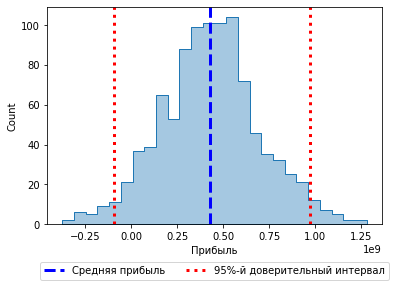

In [42]:
# !pip3 install prettytable
from prettytable import PrettyTable
import seaborn as sns
from scipy import stats as st

BUDGET = 10000000000
BARREL_COST = 450
BARRELS_IN_UNIT = 1000
UNIT_COST = BARREL_COST * BARRELS_IN_UNIT
TOTAL_POINTS = 500
POINTS = 200

def revenue_2(target, predictions, points, budget, unit_cost):
    predicted_sorted = predictions.sort_values(ascending=False)
    selected = target[predicted_sorted.index][:points]
    return selected.sum() * unit_cost - budget

def bootstrap_2(target, probabilities):
    state = np.random.RandomState(888)
    values=[]
    for i in range(1000):
        target_subsample = target.sample(replace=True,\
            random_state=state, n=TOTAL_POINTS)
        
        probs_subsample = probabilities[target_subsample.index]
        values.append(revenue_2(target_subsample, probs_subsample, POINTS, BUDGET, UNIT_COST))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = st.percentileofscore(values, 0)
     
     # Отображение таблицы
    table = PrettyTable()
    table.field_names = ['Показатель', 'Значение']    
    table.add_row(['Средняя выручка', f'{mean/1e6:.1f} млн'])
    table.add_row(['Риск', f'{risk:.2}%'])    
    table.add_row(['Доверительный интервал', f'{lower/1e6:.1f} : {upper/1e6:.1f} млн'])
    print(table)

    sns.histplot(values, alpha=0.4,  element="step")
    plt.xlabel('Прибыль')
    plt.axvline(x=mean, color='b', ls='--', lw=3, label='Средняя прибыль')
    plt.axvline(x=lower, color='r', ls=':', lw=3, label='95%-й доверительный интервал')
    plt.axvline(x=upper, color='r', ls=':', lw=3)
    plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
    plt.show()
    
bootstrap_2(target_valid_2, prediction_2)

# Вывод

По условию задания, нужно оставить регион, где процент риска будет ниже 2.5%. Под этот критерий подходит показатель региона 1(0,7%). Средняя возможная прибыль данного региона составляет 461155817.2772397, что является высшим показателем среди остальных регионов. На основе полученных данных я бы рекомендовала создавать новую скважину в регионе 1.

## Общий вывод проекта

Мы изучили данные о запасах в трех регионах. Сделали разбивки данных на обучающую и валидационную выборки. С их помощью обучили модели Линейной регрессии и получили предсказания о средних запасах сырья. Эти показатели оказались практически идентичны реальному среднему запасу. Как показал дальнейший анализ, во всех трех регионах запас сырья ниже необходимого. Мы применили технологию Bootstrap, которая нам показала, что несмотря на небольшой запас сырья, есть перспективный регион, который может принести хорошую прибыль. Это регион 1, средняя возможная прибыль составляет 461155817.2772397 при проценте риска убытка 0,7%.